### Concrete Dataset

#####  Importing necessary libraries

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.autolayout"] = True
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#####  Reading data as a data frame 

In [129]:
df = pd.read_csv("concrete (1).csv")
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


##### 1.)  Deliverable -1 (Exploratory data analysis)
#####  a.) Univariate analysis 

###### Datatypes of the attributes

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [131]:
df.shape

(1030, 9)

In [132]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

##### Description of the independent attributes

In [133]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [134]:
df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

The mean and median are close for the attributes cement, water, superplastic, coarseagg, fineagg and strength so they can be normally distributed
Ash, slag and age have a prominent and increasing distribution from 25th, 50th and 75th percentile there they can be a positive skewness

In [135]:
df.select_dtypes(include=np.number).columns.tolist()

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

##### Missing values

In [136]:
df.isna().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [137]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [138]:
df2 = df.copy()
df2.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51


##### Distributions all the independent attributes

Text(0.5, 0, 'cement')

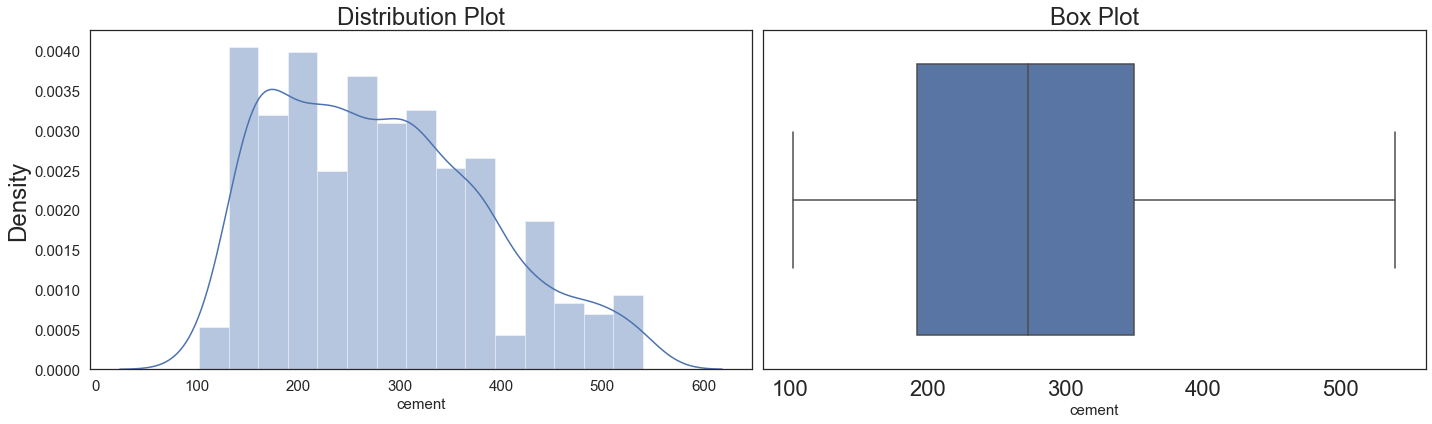

In [139]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['cement'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('cement', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['cement'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('cement', fontsize=15)

'Cement' has no outliers and the data points are positively skewed as there is longer tail on the right side 

Text(0.5, 0, 'Age')

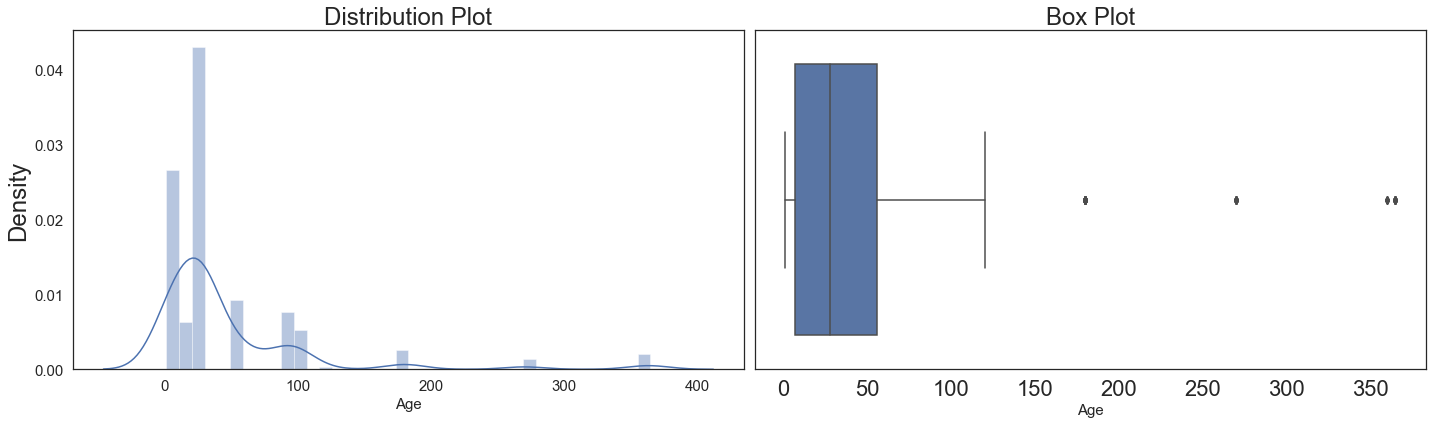

In [140]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df['age'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('Age', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df['age'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('Age', fontsize=15)

'Age' has outliers and the data points are highly right skewed

Text(0.5, 0, 'Ash')

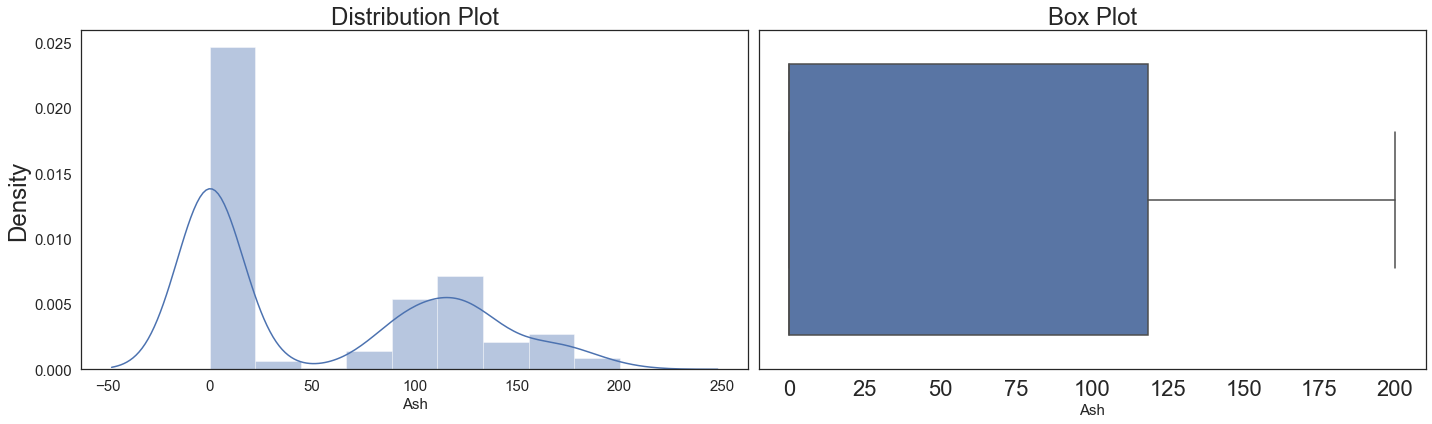

In [141]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['ash'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('Ash', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['ash'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('Ash', fontsize=15)

'Ash' has no outliers and the data points are unevenly distributed and has skewness

Text(0.5, 0, 'Slag')

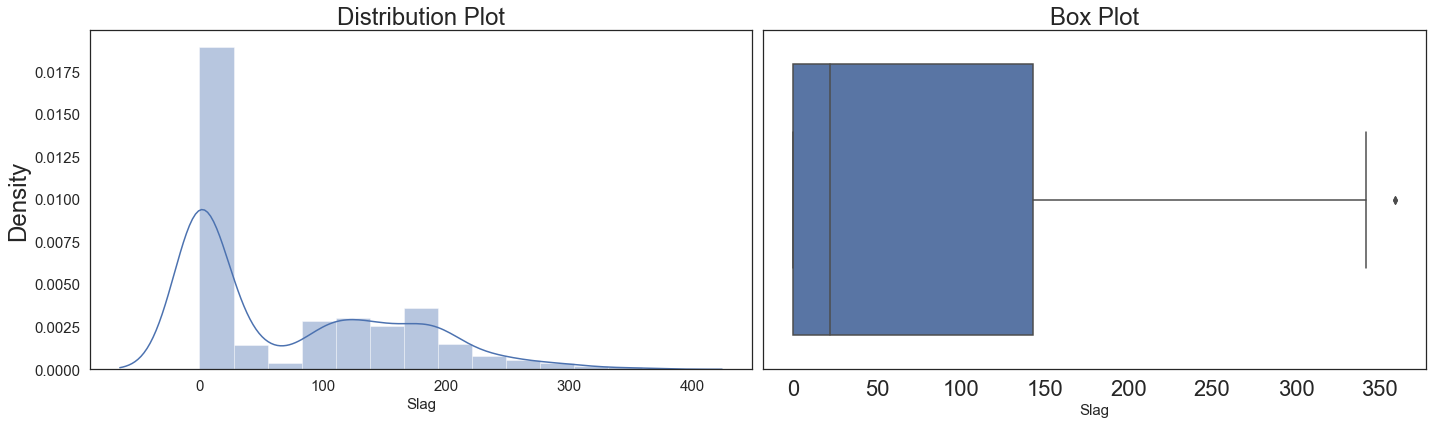

In [142]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['slag'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('Slag', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['slag'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('Slag', fontsize=15)

'Slag' has outliers and the data points are skewed with longer tail on the right side 

Text(0.5, 0, 'water')

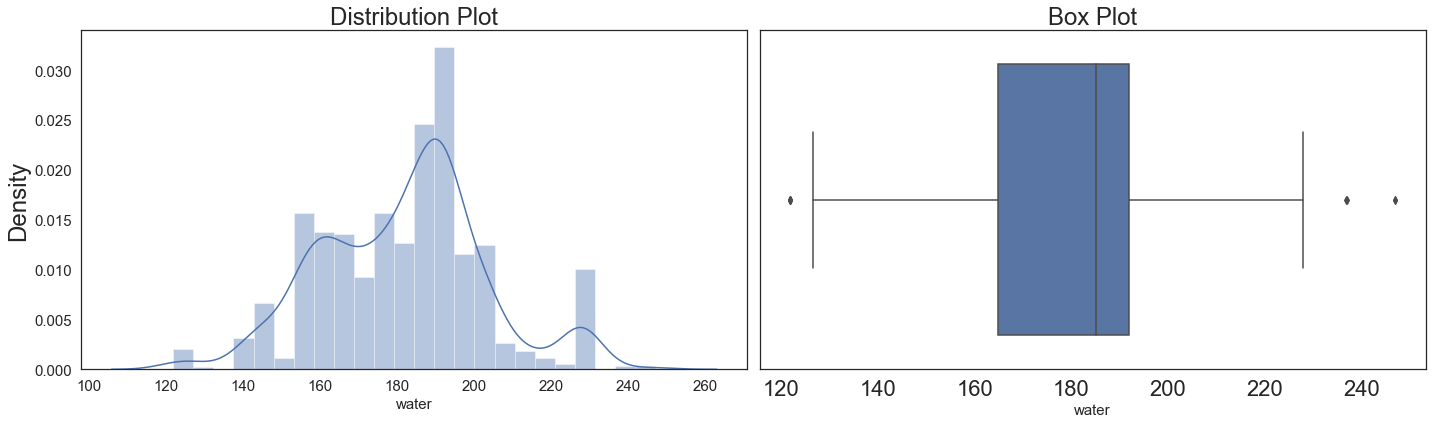

In [143]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['water'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('water', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['water'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('water', fontsize=15)

'Water' has outliers on both ends and the data points are not evenly distributed however there is no considerable skewness

Text(0.5, 0, 'superplastic')

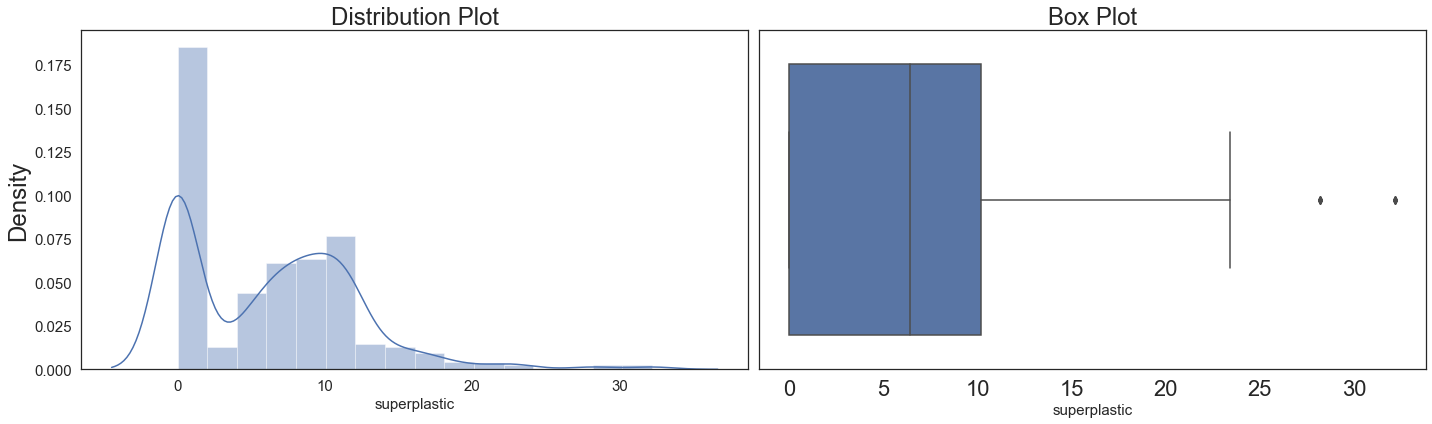

In [144]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['superplastic'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('superplastic', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['superplastic'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('superplastic', fontsize=15)

'Superplastic' has outliers on the right end and there is right skewness

Text(0.5, 0, 'strength')

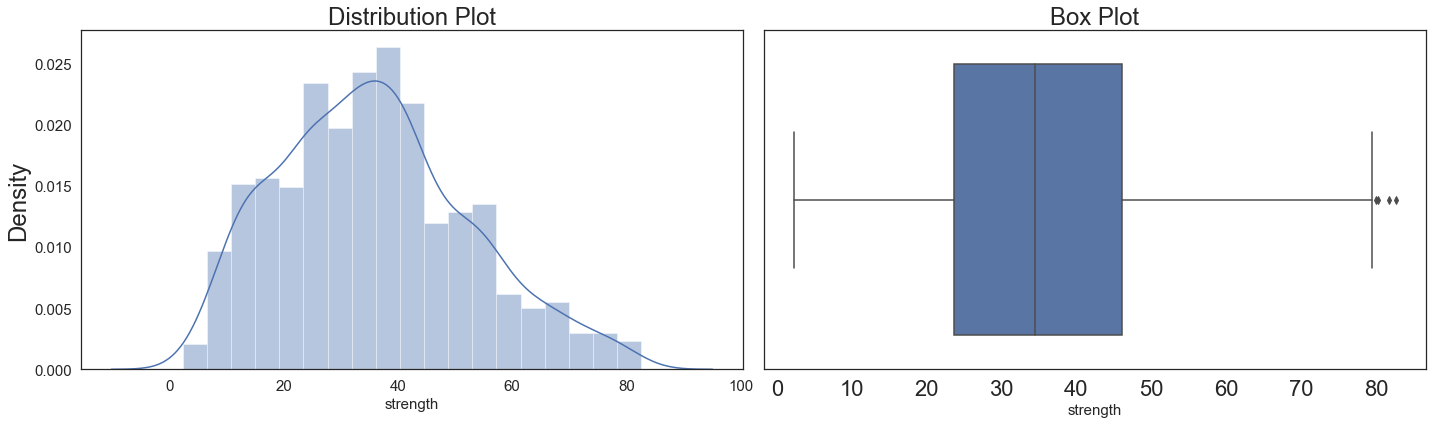

In [146]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['strength'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('strength', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['strength'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('strength', fontsize=15)

'Strength' attribute is right skewed and there is no huge marginal differnce in outliers

Text(0.5, 0, 'fineagg')

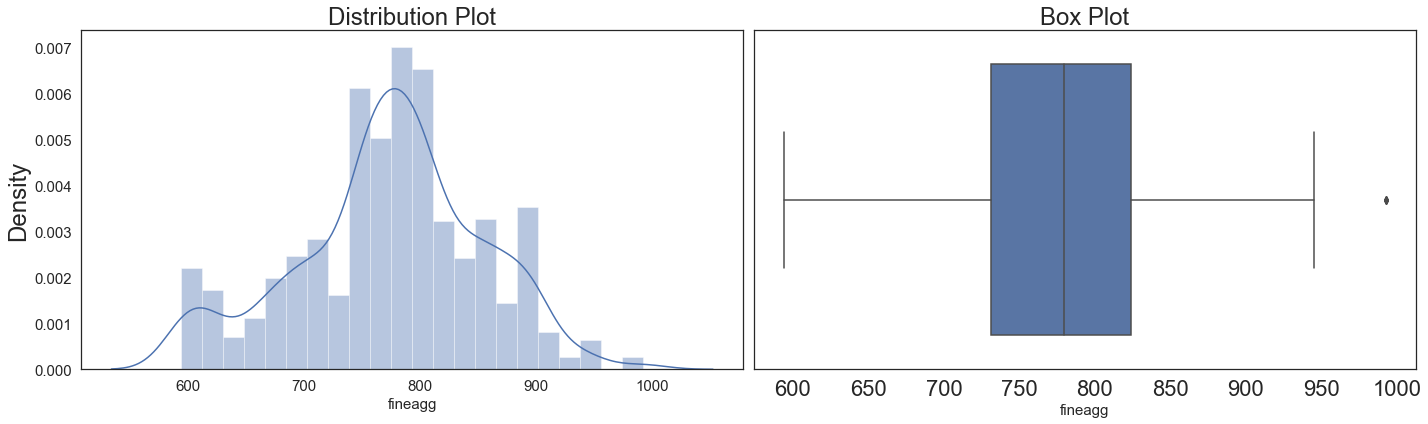

In [147]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['fineagg'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('fineagg', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['fineagg'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('fineagg', fontsize=15)

'fineagg' has outliers on the right end and is slightly skewed towards the right

Text(0.5, 0, 'coarseagg')

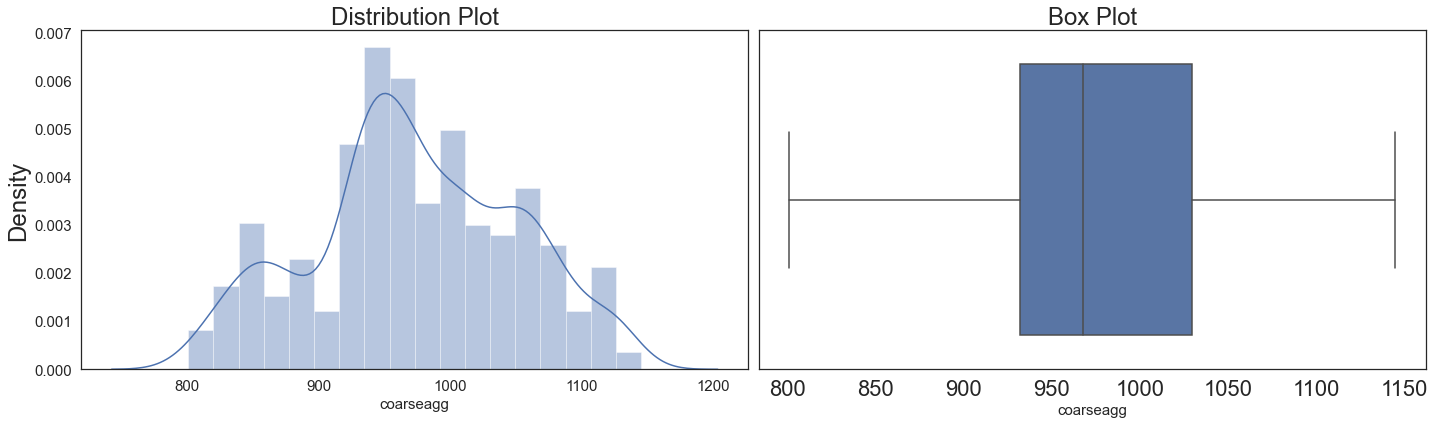

In [148]:
fig, (fig1, fig2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(df2['coarseagg'],ax=fig1)
fig1.tick_params(labelsize=15)
fig1.set_xlabel('coarseagg', fontsize=15)
fig1.set_title("Distribution Plot")


sns.boxplot(df2['coarseagg'],ax=fig2)
fig2.set_title("Box Plot")
fig2.set_xlabel('coarseagg', fontsize=15)

'coarseagg' doesn't have outliers and is not skewed

##### Age, slag, water, superplastic, fineagg has outliers 

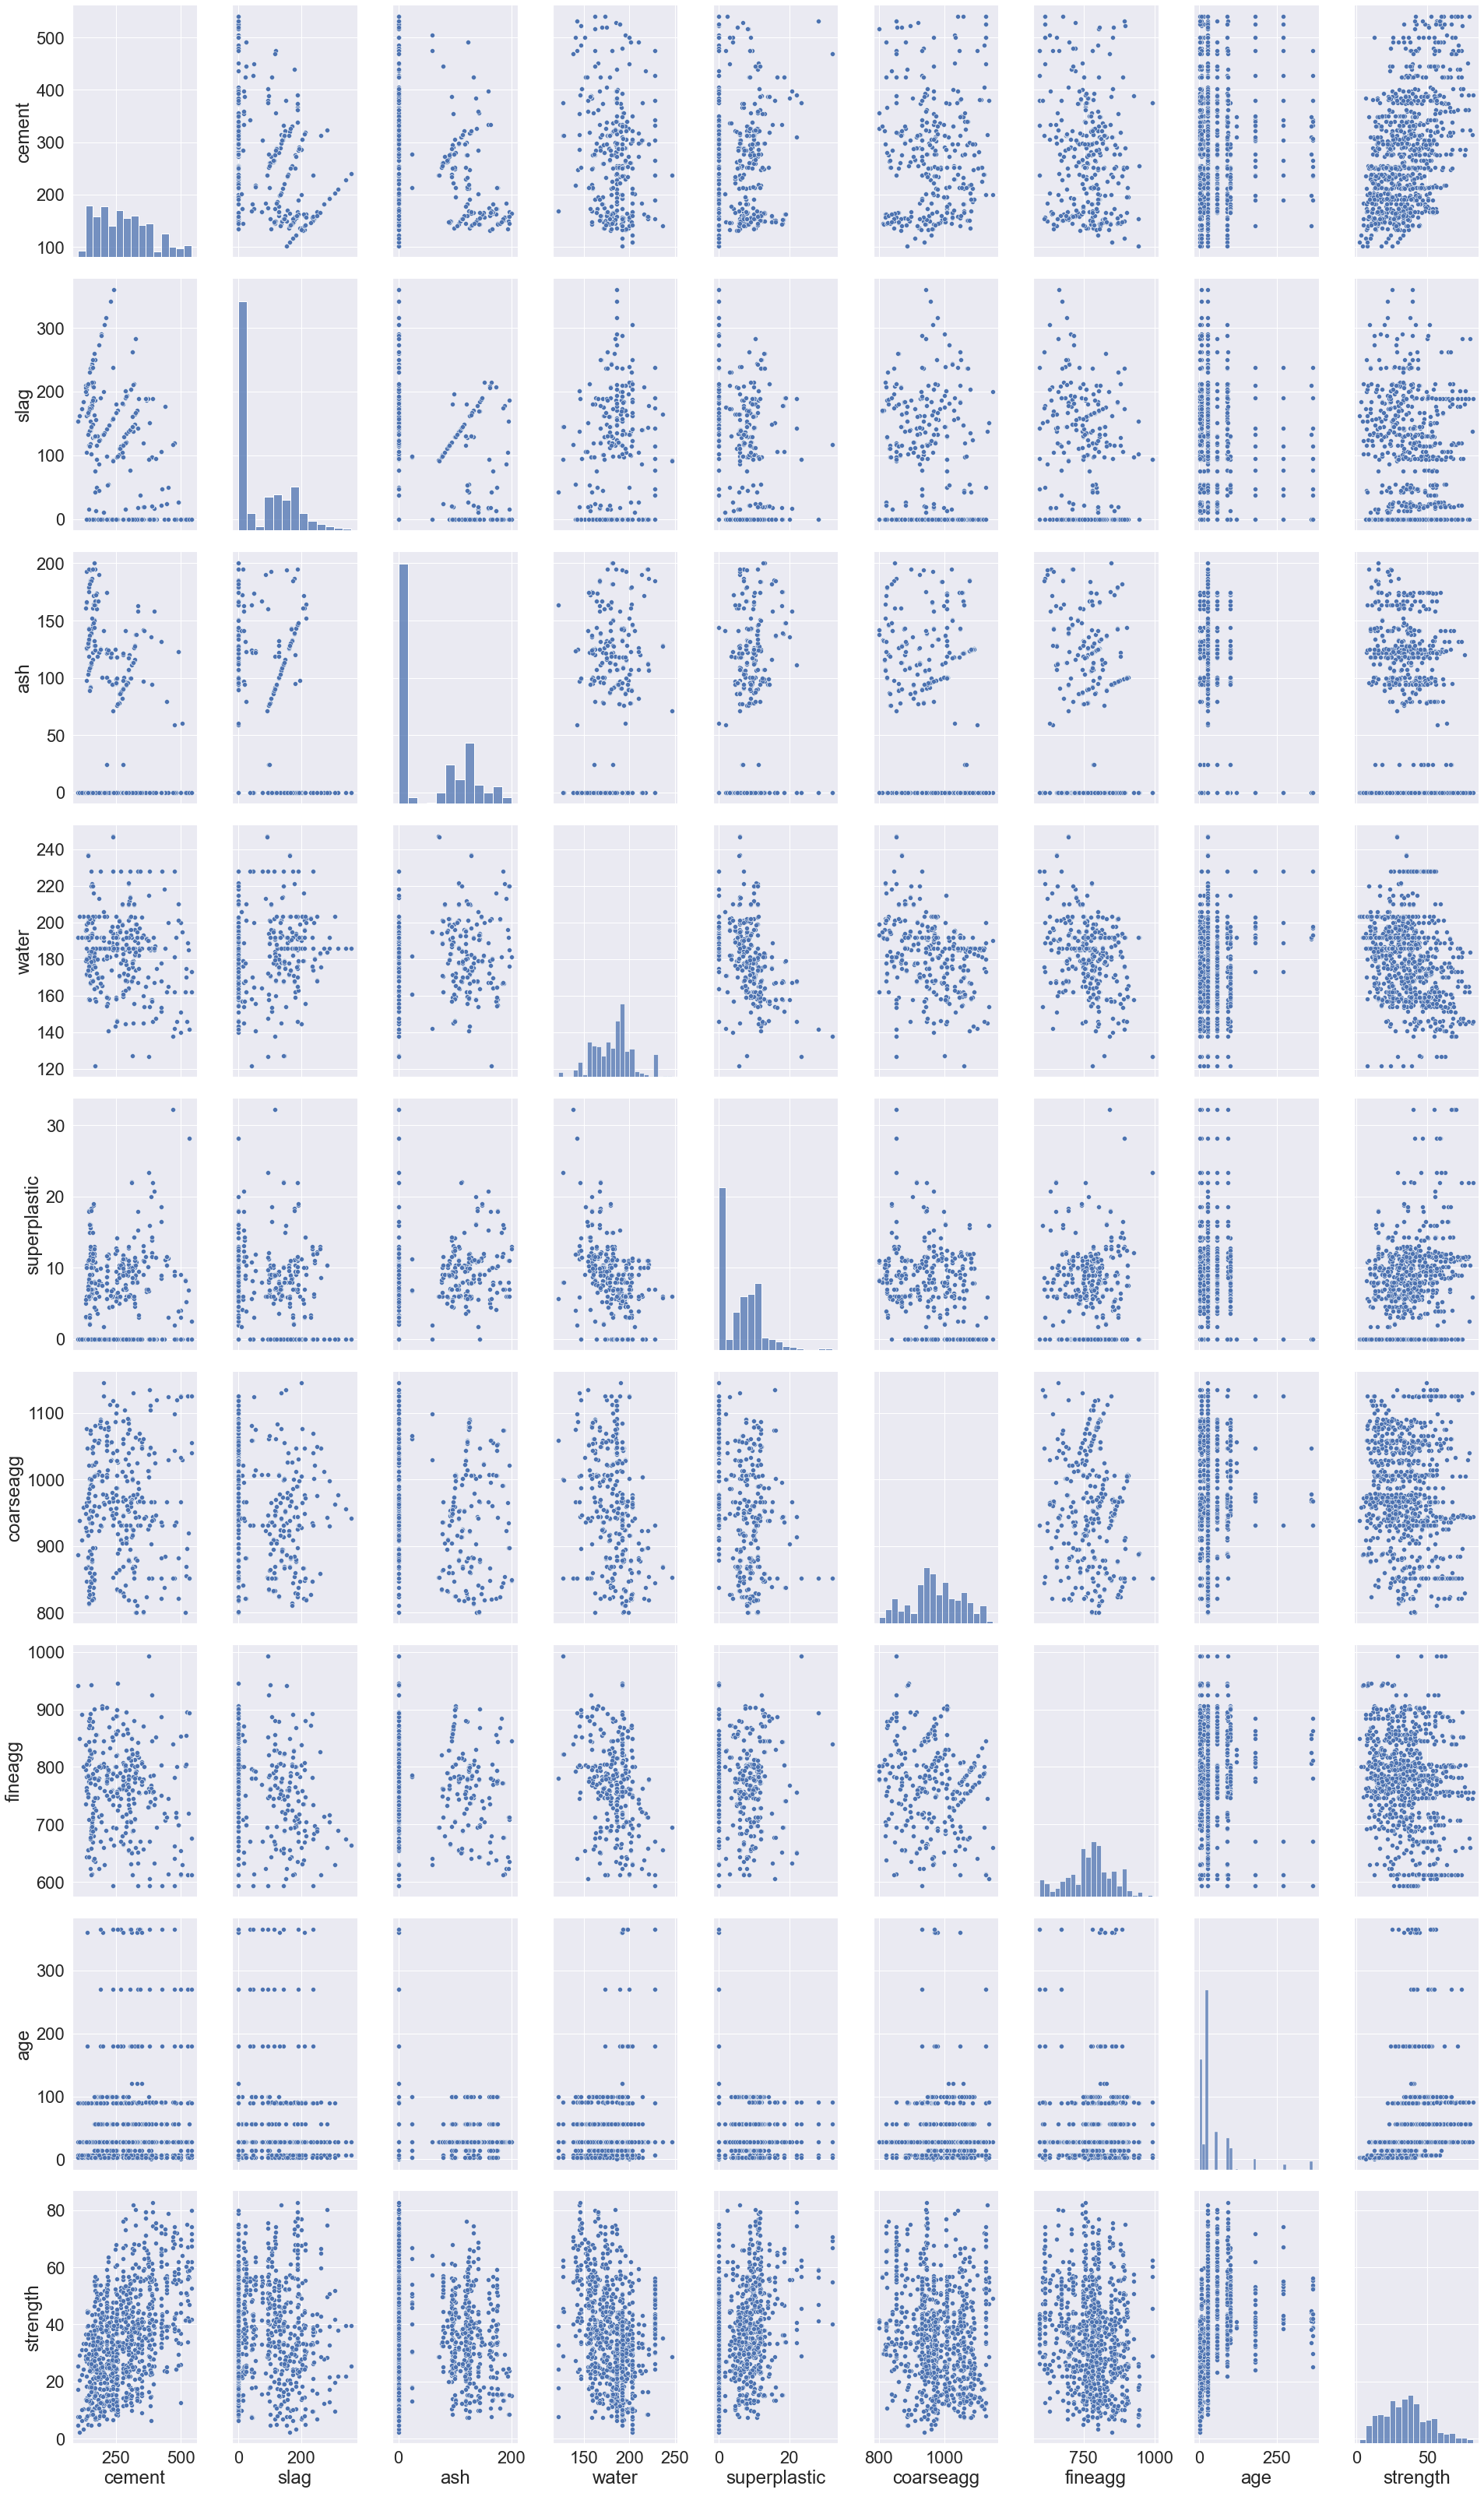

In [149]:
# Pair plot of all the attributes
sns.set(font_scale = 2)
sns.pairplot(df2, height=5, aspect=0.6)

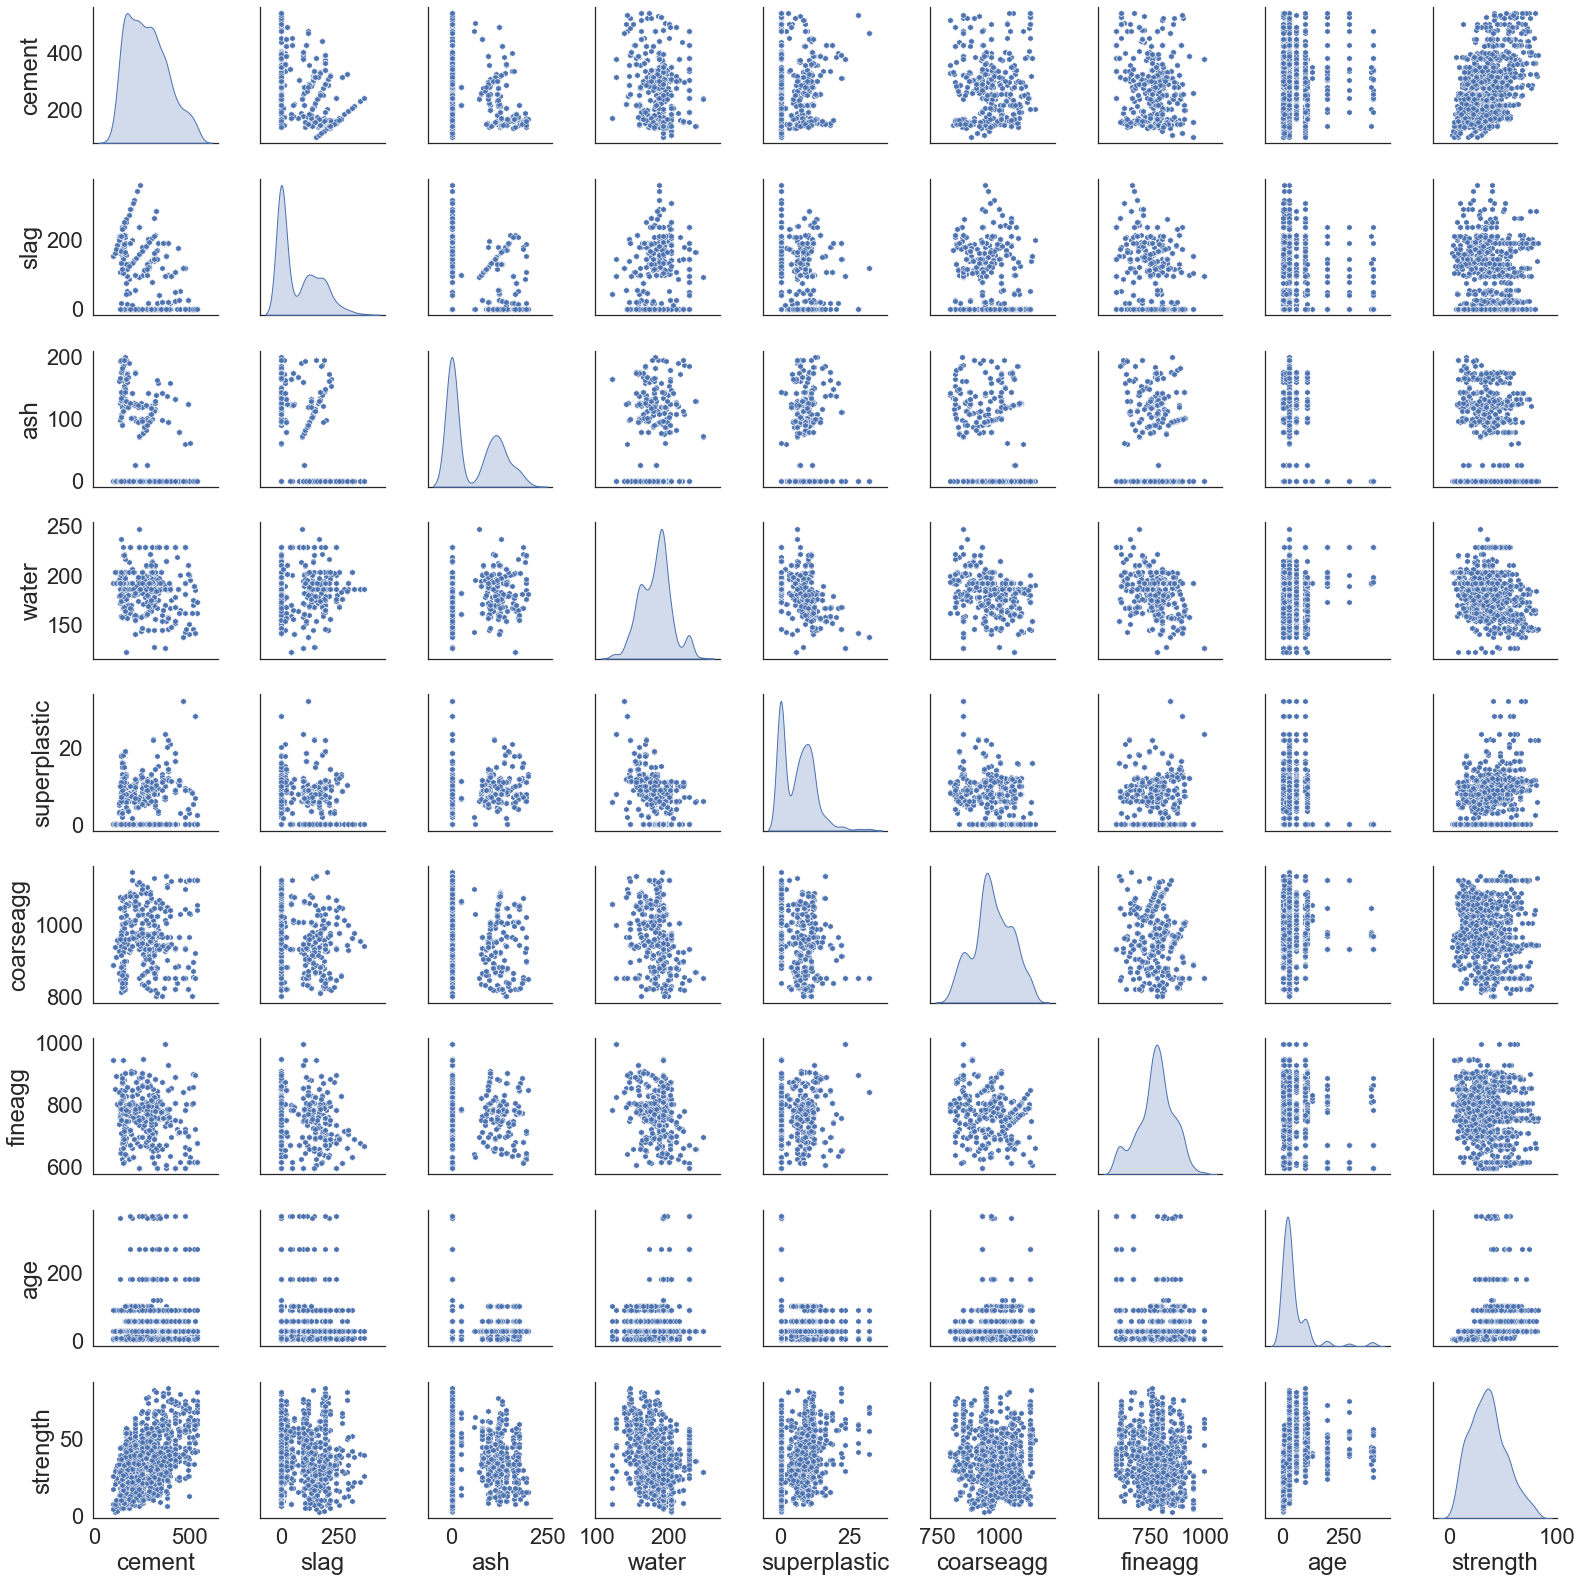

In [153]:
sns.pairplot(df2, markers="h", diag_kind = 'kde')
plt.show()

In [151]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

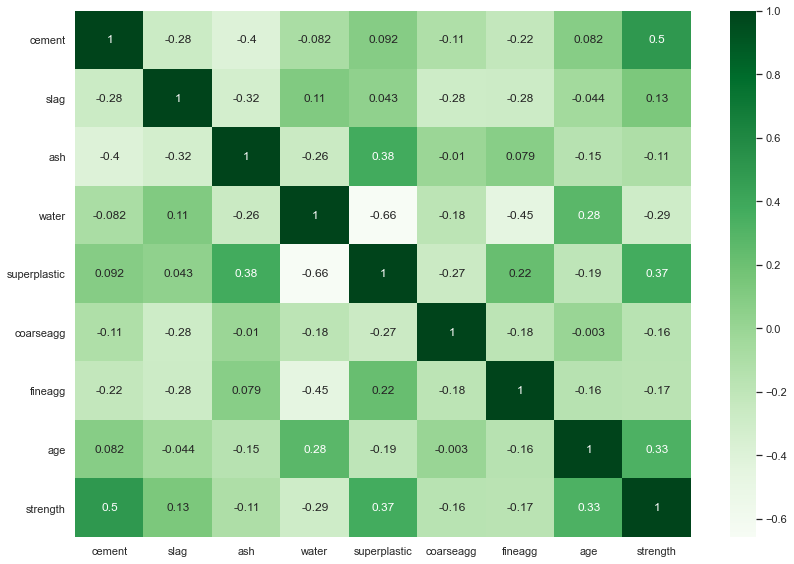

In [167]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='Greens')

Text(0.5, 1.0, 'Cement vs Strength')

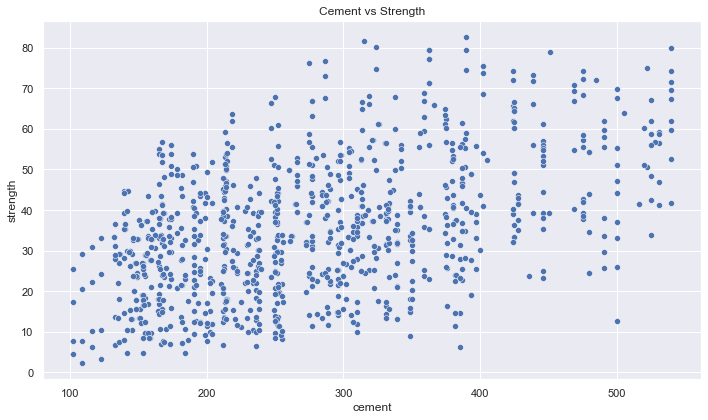

In [324]:
# sns.set_style('white')
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1)
sns.scatterplot(x=df2['cement'], y=df2['strength'])
plt.title('Cement vs Strength')

Text(0.5, 1.0, 'Age vs Strength')

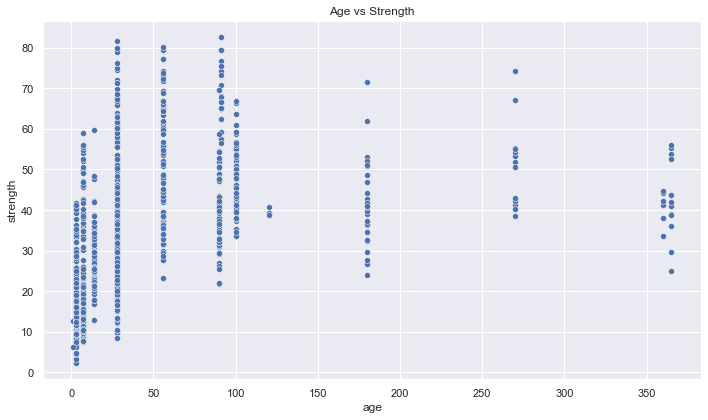

In [325]:
# sns.set_style('white')
plt.figure(figsize = (10, 6))
sns.set(font_scale = 1)
sns.scatterplot(y=df2['strength'], x=df2['age'])
plt.title('Age vs Strength')

From the above pair plots and correlations it can be seen that,
'Strength' has positive correlation with cement and superplastic. 
Strength is more in the interval of 20-100 days. After that interval strength decreases.
Slag, cement and ash have a tendency to create linear relation. Superplastic has positive linear correlation with ash and fineagg.
Superplastic and water have strong negative correlation. Other than that, there is no strong correlation between any attributes.

Text(0.5, 1.0, 'Cement by Strength, water and age distributions')

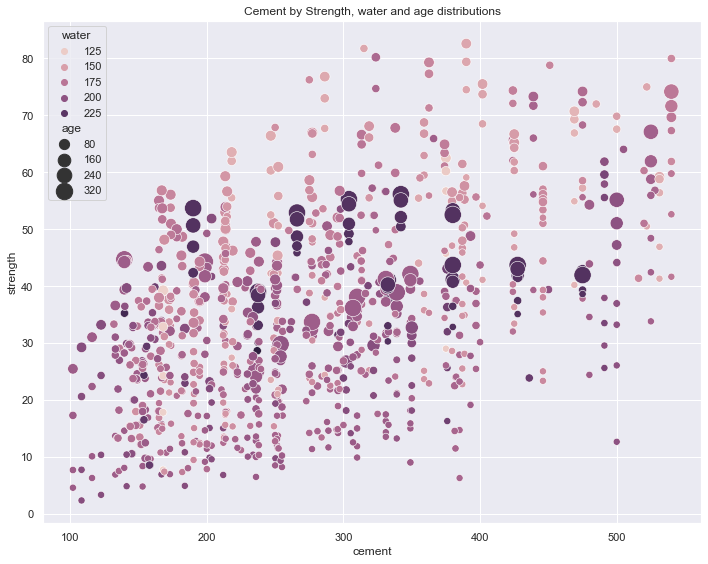

In [336]:
plt.figure(figsize=[10,8])
sns.scatterplot(y="strength", x="cement", hue="water",size="age", data=df2, sizes=(50, 300))
plt.title('Cement by Strength, water and age distributions')

###### Strength increases with the amount of cement
###### Strength of concrete has a linear correlation with age
###### Water content is fairly less in concrete with highest strength as there are more lighter dots when we move on the higher end of y-axis
###### Strength of concrete increases with time(more larger dots along y-axis)
###### As the cement gets old, it requires more water to achieve maximum strength(larger and dark dots along the y-axis)

Text(0.5, 1.0, 'Cement by Strength, water and age distributions')

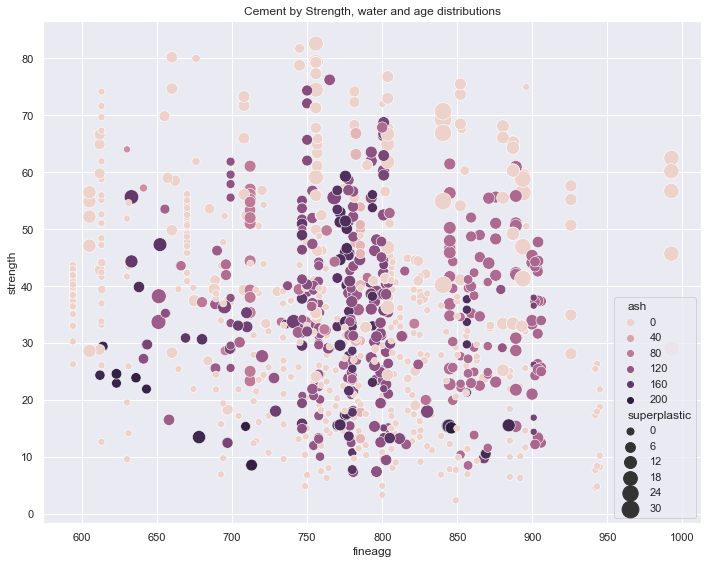

In [339]:
plt.figure(figsize=[10,8])
sns.scatterplot(y="strength", x="fineagg", hue="ash",size="superplastic", data=df2, sizes=(50, 300))
plt.title('Cement by Strength, water and age distributions')

###### The concrete with higher strength has less amount of ash and strength increases as the amount of superplastic increases(larger and lighter dots at the higher end of y-axis) 

From the above Multivariate analysis, it can be concluded that multiple features considered together is more influential on the overall strength rather than it being considered individually. Therefore, dropping any feature is not advisible.
Also attributes like slag, ash, water and superplastic fpllow multiple gaussian distribution.

The outliers can be detected and removed using Zscore or Inter Quartile Range method. The detected outliers can be Trimmed/removed, capped based on quantiles or simply replaced with mean/median

In [326]:
#Zscore method
outliers = []
def detect_outliers_zscore(df2):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

For the given dataset, I have used the IQR method. Anything beyond the interquartile range is considered as an outlier 

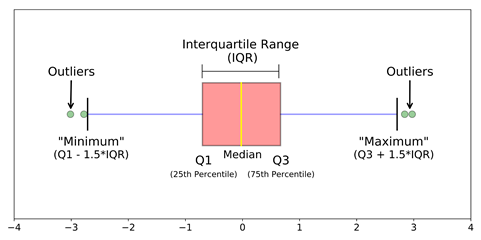

In [34]:
outlier_columns = []
upper_bound = {}
lower_bound = {}

Q1 =  df2['water'].quantile(0.25) # 1º Quartile
Q3 =  df2['water'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

lbound_water = Q1 - 1.5 * IQR   # lower bound 
ubound_water = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print(lbound_water,'< Water <',ubound_water)
print('Numerber of outliers in water column below the lower bound =', df2[df2['water'] < (Q1-(1.5*IQR))]['water'].count())
print('Numerber of outliers in water column above the upper bound =', df2[df2['water'] > (Q3+(1.5*IQR))]['water'].count())

Interquartile range =  27.099999999999994
124.25000000000001 < Water < 232.64999999999998
Numerber of outliers in water column below the lower bound = 5
Numerber of outliers in water column above the upper bound = 4


In [35]:
# calculate mean
mean = np.mean(df2['water']) 
# calculate standard deviation
sd = np.std(df2['water'])
# determine a threhold
threshold = 2
# create empty list to store outliers
outliers = []
# detect outlier
for i in df2['water']: 
    z = (i-mean)/sd # calculate z-score
    if z > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
   
#print("The detected outliers are: ", outliers)

In [36]:
outlier_columns = []

Q1 =  df2['age'].quantile(0.25) 
Q3 =  df2['age'].quantile(0.75) 
IQR = Q3 - Q1                      

lbound_age = Q1 - 1.5 * IQR    
ubound_age = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_age,'< Age <',ubound_age)
print('Numerber of outliers in age column below the lower bound =', df2[df2['age'] < (Q1-(1.5*IQR))]['age'].count())
print('Numerber of outliers in age column above the upper bound =', df2[df2['age'] > (Q3+(1.5*IQR))]['age'].count())

Interquartile range =  49.0
-66.5 < Age < 129.5
Numerber of outliers in age column below the lower bound = 0
Numerber of outliers in age column above the upper bound = 59


In [37]:
outlier_columns = []

Q1 =  df2['slag'].quantile(0.25) 
Q3 =  df2['slag'].quantile(0.75) 
IQR = Q3 - Q1                      

lbound_slag = Q1 - 1.5 * IQR   
ubound_slag = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_slag,'< Slag <', ubound_slag)
print('Numerber of outliers in slag column below the lower bound =', df2[df2['slag'] < (Q1-(1.5*IQR))]['slag'].count())
print('Numerber of outliers in slag column above the upper bound =', df2[df2['slag'] > (Q3+(1.5*IQR))]['slag'].count())

Interquartile range =  142.95
-214.42499999999998 < Slag < 357.375
Numerber of outliers in slag column below the lower bound = 0
Numerber of outliers in slag column above the upper bound = 2


In [38]:
outlier_columns = []

Q1 =  df2['superplastic'].quantile(0.25) 
Q3 =  df2['superplastic'].quantile(0.75)
IQR = Q3 - Q1                      

lbound_superplastic = Q1 - 1.5 * IQR   
ubound_superplastic = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_superplastic,'< Superplastic <',ubound_superplastic)
print('Numerber of outliers in superplastic column below the lower bound =', df2[df2['superplastic'] < (Q1-(1.5*IQR))]['superplastic'].count())
print('Numerber of outliers in superplastic column above the upper bound =', df2[df2['superplastic'] > (Q3+(1.5*IQR))]['superplastic'].count())

Interquartile range =  10.2
-15.299999999999999 < Superplastic < 25.5
Numerber of outliers in superplastic column below the lower bound = 0
Numerber of outliers in superplastic column above the upper bound = 10


In [39]:
outlier_columns = []

Q1 =  df2['fineagg'].quantile(0.25) 
Q3 =  df2['fineagg'].quantile(0.75) 
IQR = Q3 - Q1                     

lbound_fineagg = Q1 - 1.5 * IQR    
ubound_fineagg = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_fineagg,'< Fineagg <',ubound_fineagg)
print('Numerber of outliers in fineagg column below the lower bound =', df2[df2['fineagg'] < (Q1-(1.5*IQR))]['fineagg'].count())
print('Numerber of outliers in fineagg column above the upper bound =', df2[df2['fineagg'] > (Q3+(1.5*IQR))]['fineagg'].count())

Interquartile range =  93.05000000000007
591.3749999999998 < Fineagg < 963.575
Numerber of outliers in fineagg column below the lower bound = 0
Numerber of outliers in fineagg column above the upper bound = 5


In [40]:
outlier_columns = []

Q1 =  df2['strength'].quantile(0.25) 
Q3 =  df2['strength'].quantile(0.75) 
IQR = Q3 - Q1                      

lbound_strength = Q1 - 1.5 * IQR   
ubound_strength = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_strength,'< strength <',ubound_strength)
print('Numerber of outliers in strength column below the lower bound =', df2[df2['strength'] < (Q1-(1.5*IQR))]['strength'].count())
print('Numerber of outliers in strength column above the upper bound =', df2[df2['strength'] > (Q3+(1.5*IQR))]['strength'].count())

Interquartile range =  22.425000000000008
-9.927500000000013 < strength < 79.77250000000001
Numerber of outliers in strength column below the lower bound = 0
Numerber of outliers in strength column above the upper bound = 4


In [41]:
outlier_columns = []

Q1 =  df2['ash'].quantile(0.25) 
Q3 =  df2['ash'].quantile(0.75) 
IQR = Q3 - Q1                      
lbound_ash = Q1 - 1.5 * IQR   
ubound_ash = Q3 + 1.5 * IQR   

print('Interquartile range = ', IQR)
print(lbound_ash,'< ash <',ubound_ash)
print('Numerber of outliers in strength column below the lower bound =', df2[df2['ash'] < (Q1-(1.5*IQR))]['ash'].count())
print('Numerber of outliers in strength column above the upper bound =', df2[df2['ash'] > (Q3+(1.5*IQR))]['ash'].count())

Interquartile range =  118.3
-177.45 < ash < 295.75
Numerber of outliers in strength column below the lower bound = 0
Numerber of outliers in strength column above the upper bound = 0


In [42]:
outlier_columns.append('water')
lower_bound['water'] = lbound_water
upper_bound['water'] = ubound_water

outlier_columns.append('age')
lower_bound['age'] = lbound_age
upper_bound['age'] = ubound_age

outlier_columns.append('Fineagg')
lower_bound['Fineagg'] = lbound_fineagg
upper_bound['Fineagg'] = ubound_fineagg

outlier_columns.append('slag')
lower_bound['slag'] = lbound_slag
upper_bound['slag'] = ubound_slag

outlier_columns.append('superplastic')
lower_bound['superplastic'] = lbound_superplastic
lower_bound['superplastic'] = ubound_superplastic

outlier_columns.append('strength')
lower_bound['strength'] = lbound_strength
upper_bound['strength'] = ubound_strength

In [43]:
print(outlier_columns)
print('\n\n', lower_bound)
print('\n\n', upper_bound)

['water', 'age', 'Fineagg', 'slag', 'superplastic']


 {'water': 124.25000000000001, 'age': -66.5, 'Fineagg': 591.3749999999998, 'slag': -214.42499999999998, 'superplastic': 25.5, 'strength': -9.927500000000013}


 {'age': 129.5, 'water': 232.64999999999998, 'Fineagg': 963.575, 'slag': 357.375, 'strength': 79.77250000000001}


In [44]:
concrete_df = df2.copy()

##### Replacing the outliers with median

In [175]:
for i in concrete_df.columns[:-1]:
    q1 = concrete_df[i].quantile(0.25)
    q3 = concrete_df[i].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    concrete_df.loc[(concrete_df[i] < low) | (concrete_df[i] > high), i] = concrete_df[i].median()

In [46]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [48]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


###### Using 'StandardScaler' to scale each attribute to unit variance and creating train and test sets

In [191]:
# independent variables
X = concrete_df.drop(['strength'],axis=1)
# dependent variable
y = concrete_df['strength']
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [192]:
len(X_train)

721

In [54]:
len(y_test)

309

In [56]:
X.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [57]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

##### Linear Regression model

In [271]:
lr=LinearRegression()
fit=lr.fit(X_train ,y_train)
score = lr.score(X_test, y_test)
print('Score of Linear regression model:',(score))

y_predict = lr.predict(X_test)
print('Mean squared error :',mean_squared_error(y_test,y_predict))
rms = np.sqrt(mean_squared_error(y_test,y_predict)) 
print('Root mean squared error : {}'.format(rms))

Score of Linear regression model: 0.754232302109797
Mean squared error : 70.32691719942153
Root mean squared error : 8.386114547239474


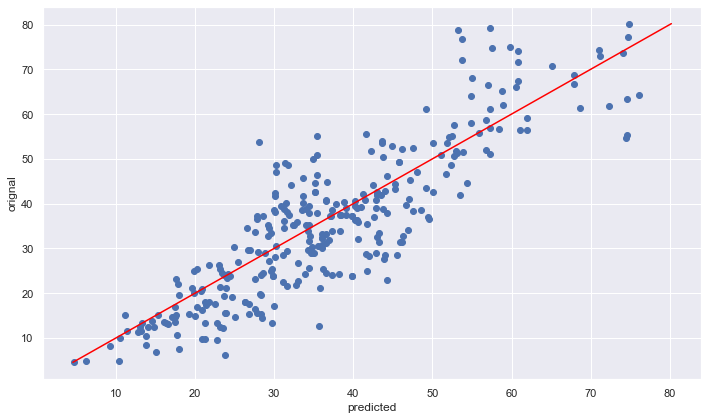

In [266]:
plt.figure(figsize=[10,6])
plt.scatter(y_predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

###### Lasso and Ridge regression models

In [272]:
r = Ridge()
l = Lasso()
fit_r = r.fit(X_train, y_train)
fit_l = l.fit(X_train, y_train)

print("""Score of Ridge regression model : {:.2f}""" .format(r.score(X_test, y_test)))
print("""Mean squared error of Ridge : {:.2f}""" .format(mean_squared_error(y_test,r.predict(X_test))))
print("""Root mean squared error of Ridge : {:.2f}""" .format(np.sqrt(mean_squared_error(y_test, r.predict(X_test)))))

print('------------------------------------------------------------------')


print("""Score of lasso is : {:.2f}""" .format(l.score(X_test,y_test)))
print("""Mean squared error of Lasso : {:.2f}""" .format(mean_squared_error(y_test,l.predict(X_test))))
print("""Root mean squared error of Lasso : {:.2f}""" .format(np.sqrt(mean_squared_error(y_test, l.predict(X_test)))))

Score of Ridge regression model : 0.75
Mean squared error of Ridge : 70.41
Root mean squared error of Ridge : 8.39
------------------------------------------------------------------
Score of lasso is : 0.72
Mean squared error of Lasso : 78.87
Root mean squared error of Lasso : 8.88


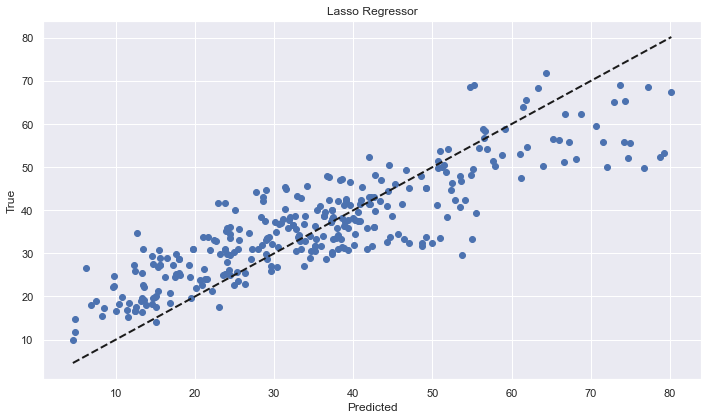

In [268]:
plt.scatter(y_test, l.predict(X_test)) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Lasso Regressor") 
plt.show()

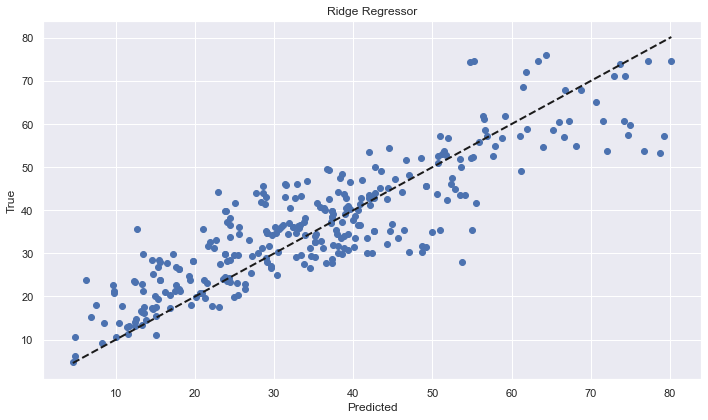

In [269]:
plt.figure(figsize=[10,6])
plt.scatter(y_test, r.predict(X_test)) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Ridge Regressor") 
plt.show()

When Linear, lasso and ridge resression models are compared, linear and ridge perform similarly with almost same score and RMSE

##### Cross-validation of linear regression model

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [63]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.71954528, 0.73888424, 0.75110056, 0.72084905, 0.7429733 ])

For linear model, the performance score can be as high as 0.75 only

##### Decision Tree Regression model

Score of Decision Tree Regressor model : 0.79
Mean squared error of DTR : 60.33
Root mean squared error of DTR : 7.77


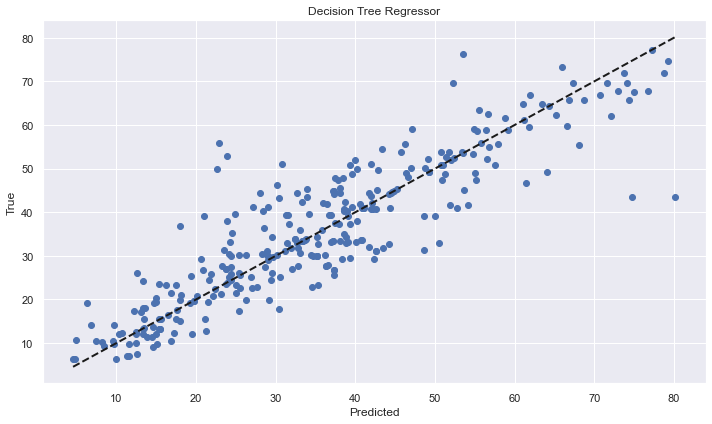

In [323]:
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 

print("""Score of Decision Tree Regressor model : {:.2f}""" .format(dtr.score(X_test, y_test)))
print("""Mean squared error of DTR : {:.2f}""" .format(mean_squared_error(y_test, dtr.predict(X_test))))
print("""Root mean squared error of DTR : {:.2f}""" .format(np.sqrt(mean_squared_error(y_test, dtr.predict(X_test)))))

plt.figure(figsize=[10,6])
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

Compared to the models that was used so far, Decision Tree regressor model performed better with a higher score and reduced RMSE.

###### Random Forest Regression model

In [306]:
rfr = RandomForestRegressor(n_estimators = 175, max_features = 'sqrt',  criterion= 'mse')

rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 
# print("Model\t\t\t\t RMSE \t\t R2 \t\t Score")
# print("""Random Forest Regressor \t {:.2f} \t\t{:.2f} """.format( ), mean_squared_error(y_test, y_pred_rfr) ,r2_score(y_test, y_pred_rfr)) 
#print('Random Forest Regressor score : ', rfr.score(X_test, y_test))

print("""Score of Random Forest regressor : {:.2f}""" .format(rfr.score(X_test, y_test)))
print("""Mean squared error of RFR : {:.2f}""" .format(mean_squared_error(y_test, y_pred_rfr)))
print("""Root mean squared error of RFR : {:.2f}""" .format(np.sqrt(mean_squared_error(y_test, y_pred_rfr)))) 

Score of Random Forest regressor : 0.84
Mean squared error of RFR : 44.99
Root mean squared error of RFR : 6.71


Deliverable -4 (Tuning the model) 
After testing the train and test set with different models, it can be seen that Random forest regressor performed the best. It has the least RMSE and highest score out of all the regression models used so far.

Hyperparameter tuning techniques are used to find the best possible combinations of parameters for different models.  This is done using GridSearchCV or RandomizedSerachCV. RandomizedSerachCV is faster than the former as it doesn't check for each and every combinations everytime. However, for smaller datasets GridSearchCV works the best as it tests every combination possible.

###### GridSearchCV for hyperparameter tuning

In [299]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1.0,2.0],
                'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'lbfgs']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
               
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
            
        },
        'random_forest_regression': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [100, 120, 150, 200],
                 'criterion' : ['mse', 'absolute_error', 'poisson'],
                'min_samples_split' : [2, 2.5, 3],
#                'max_depth' : [0, 2, 3, 10]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.733168,{'normalize': True}
1,lasso,0.733382,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.733242,"{'alpha': 2.0, 'solver': 'sparse_cg'}"
3,decision_tree,0.819679,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
4,random_forest_regression,0.873635,"{'criterion': 'mse', 'min_samples_split': 3, '..."


The best  score is obtained using Random Forest Regresssor with the accuracy of 87.4%. The performance of this model can further improved by carrying out hyperparameter tuning using GridSearchCV at a greater depth where every parameter that is capable of improving the overall performance of the model, is taken into consideration. However it is also important to avoid overfitting. This can be done using Cross validation technique, removing features and training model with more data if available and so on.

##### RandomizedSearchCV for hyperparameter tuning

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
criterion = ['mse', 'absolute_error', 'poisson']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   7.5s
[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.8s
[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   7.0s
[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.6s
[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.8s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [296]:
# The best parameter values given by RandomizedSearchCV for RFR model
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'mse'}